In [1]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('user_to_mention.csv')

In [24]:
df_new = df.drop(['user_id', 'screen_name'], axis=1)

In [25]:
# sum row
df['mention'] = df_new.sum(axis=1)
# sum column
df['mentioned'] = df_new.sum()


In [26]:
for x in df['screen_name']:
    if x in list(df):
        df.mentioned[df['screen_name']==x]=df_new[x].sum()

C:\Users\Computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df['mentioned'] = df['mentioned'].fillna(0)

In [28]:
df['m/med'] = df['mentioned']/df['mention']

In [29]:
df = df[['user_id','screen_name','mention','mentioned','m/med']]
df.head()

,user_id,screen_name,mention,mentioned,m/med
0,1437,ryansk,1,1.0,1.0
1,9375,santhoshj,2,2.0,1.0
2,10836,rex_huang,2,1.0,0.5
3,761483,netwalker,1,0.0,0.0
4,813512,invoker,1,3.0,3.0


In [30]:
print(sum(df['mentioned'].value_counts()))

1642


In [146]:
rawdata_polluters = pd.read_csv('datasets/content_polluters.txt',sep='\t', usecols=[0],header=0,names=['user_id'])
rawdata_legimaters = pd.read_csv('datasets/legitimate_users.txt',sep='\t',  usecols=[0],header=None ,names=['user_id'])
rawdata_polluters['spam'] = 'true'
rawdata_legimaters['spam'] = 'false'
rawdata_polluters.head()

,user_id,spam
0,6301,true
1,10836,true
2,10997,true
3,633293,true
4,717883,true


In [147]:
rawdata_legimaters.head()

,user_id,spam
0,614,false
1,1038,false
2,1437,false
3,2615,false
4,3148,false


In [193]:
df_with_spam = df.merge(rawdata_polluters,how='inner',on='user_id')
df_with_legit = df.merge(rawdata_legimaters,how='inner',on='user_id')

In [196]:
print(df_with_spam.shape[0])
print(df_with_spam['m/med'].mean())
df_with_spam.head()

672
0.6826762237850634


,user_id,screen_name,mention,mentioned,m/med,spam
0,10836,rex_huang,2,1.0,0.5,true
1,5775622,paynter,2,1.0,0.5,true
2,6356472,BryceGruber,1,1.0,1.0,true
3,7350652,swedal,2,0.0,0.0,true
4,7934702,rodrigo_ramirez,1,0.0,0.0,true


In [197]:
print(df_with_legit.shape[0])
print(df_with_legit['m/med'].mean())
df_with_legit.head()

972
0.7605351741973381


,user_id,screen_name,mention,mentioned,m/med,spam
0,1437,ryansk,1,1.0,1.0,false
1,9375,santhoshj,2,2.0,1.0,false
2,761483,netwalker,1,0.0,0.0,false
3,813512,invoker,1,3.0,3.0,false
4,813798,vampy,1,2.0,2.0,false


In [166]:
df_with_legit.merge(df_with_spam,left_on='user_id',right_on='user_id')

,user_id,screen_name_x,mention_x,mentioned_x,m/med_x,spam_x,screen_name_y,mention_y,mentioned_y,m/med_y,spam_y
0,15958265,AhhPhotography,30,24.0,0.8,false,AhhPhotography,30,24.0,0.8,true
1,84371497,Jamdownerz,2,0.0,0.0,false,Jamdownerz,2,0.0,0.0,true


In [228]:
df_with_label = pd.concat([df_with_spam,df_with_legit])
df_with_label.head()

,user_id,screen_name,mention,mentioned,m/med,spam
0,10836,rex_huang,2,1.0,0.5,true
1,5775622,paynter,2,1.0,0.5,true
2,6356472,BryceGruber,1,1.0,1.0,true
3,7350652,swedal,2,0.0,0.0,true
4,7934702,rodrigo_ramirez,1,0.0,0.0,true


In [172]:
if(True):
    col = 'm/med'
    df_with_spam[col] = df_with_spam[col].apply(lambda x: x+1)
    df_with_spam[col] = df_with_spam[col].apply(np.log)

    df_with_legit[col] = df_with_legit[col].apply(lambda x: x+1)
    df_with_legit[col] = df_with_legit[col].apply(np.log)

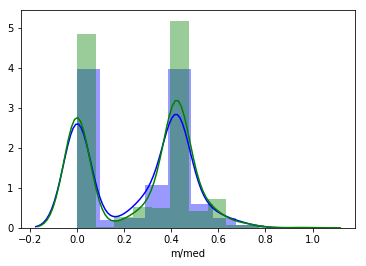

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.distplot(df_with_spam['m/med'],norm_hist=True,color='blue')
sns.distplot(df_with_legit['m/med'],norm_hist=True,color='green')
plt.show()

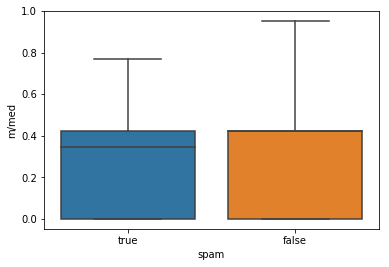

In [231]:
df_with_label['m/med']=df_with_label['m/med'].apply(lambda x: x+1)
df_with_label['m/med']=df_with_label['m/med'].apply(np.log)

sns.boxplot(x='spam', y='m/med',data=df_with_label)
plt.show()

In [233]:
print(df_with_spam['m/med'].mean())
print(df_with_legit['m/med'].mean())

0.6826762237850634
0.7605351741973381
